## Introdução
Esse trabalho foi desenvolvido para a disciplina de Tópicos Avançados em IA (Ciência dos Dados). Tem o objetivo de analisar uma base de dados do sensus de 1994 da população estadunidense, buscando encontrar diferenças socio-econômicas entre homens e mulheres e entre negros e brancos. Para cumprir esse objetivo, foram usadas técnicas de pré-processamento e estatística aprendidas em sala de aula. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
base = pd.read_csv('adult.csv')
base.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Remoção de colunas pouco relevantes
Capital gain e capital loss possuíam uma grande quantidade de valores iguais a 0. Native country possuía uma grande quantidade de valores iguais a "United States".

In [3]:
base1 = base.drop(['capital.gain', 'capital.loss','native.country'], axis=1)
base1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,40,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,40,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K


## Categorização de variáveis
Campos não númericos se tornam categóricos para facilitar sua manipulação.

In [7]:
base1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
hours.per.week     int64
income            object
dtype: object

In [4]:
base1['workclass'] = base1['workclass'].astype('category')
base1['education'] = base1['education'].astype('category')
base1['marital.status'] = base1['marital.status'].astype('category')
base1['occupation'] = base1['occupation'].astype('category')
base1['relationship'] = base1['relationship'].astype('category')
base1['race'] = base1['race'].astype('category')
base1['sex'] = base1['sex'].astype('category')
base1['income'] = base1['income'].astype('category')
base1.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
race              category
sex               category
hours.per.week       int64
income            category
dtype: object

## Inserção de dados faltantes
Para as variáveis workclass e occupation, as instâncias que possuíam como categoria "?" foram movidas para categoria "Doesnt-work".

In [5]:
base1['workclass'].cat.categories = ['Doesnt-work', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
base1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,90,Doesnt-work,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,40,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K
2,66,Doesnt-work,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,40,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K


In [6]:
base1['occupation'].cat.categories = ['Doesnt-work', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-moving']
base1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,90,Doesnt-work,77053,HS-grad,9,Widowed,Doesnt-work,Not-in-family,White,Female,40,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K
2,66,Doesnt-work,186061,Some-college,10,Widowed,Doesnt-work,Unmarried,Black,Female,40,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K


## Normalização de variáveis
Para facilitar a visualização dos dados, a normalização das variáveis numéricas não foi realizada.

## Remoção de outliers (Z-Score Robusto)

In [17]:
base1['hours.per.week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

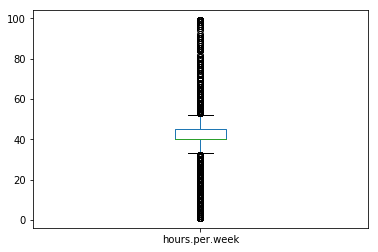

In [16]:
base1['hours.per.week'].plot.box()

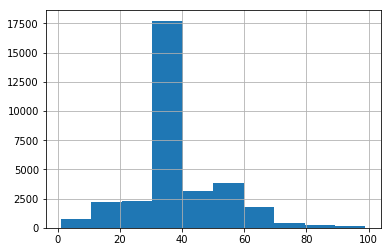

In [18]:
base1['hours.per.week'].hist()

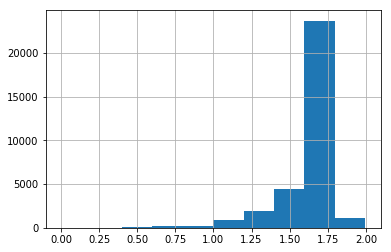

In [282]:
from numpy import log10
base1['hours_log'] = log10(base1['hours.per.week'])
base1['hours_log'].hist()

In [283]:
from numpy import abs
mad = abs(base1['hours.per.week'] - base1['hours.per.week'].median()).median()*(1/0.6745)
print(mad)

4.447739065974796


In [284]:
base1['hours.per.week'].mad()

7.583227510278985

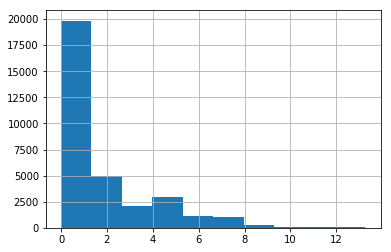

In [285]:
(abs(base1['hours.per.week']-base1['hours.per.week'].median())/mad).hist()

In [286]:
base1[abs(base1['hours.per.week'] - base1['hours.per.week'].median())/mad > 3.5]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income,difference,hours_log
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K,NaN,1.255273
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,20,>50K,NaN,1.301030
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,60,>50K,NaN,1.778151
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,20,>50K,NaN,1.301030
16,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,76,>50K,NaN,1.880814
29,38,Private,175360,10th,6,Never-married,Prof-specialty,Not-in-family,White,Male,90,>50K,NaN,1.954243
32,52,Private,198863,Prof-school,15,Divorced,Exec-managerial,Not-in-family,White,Male,60,>50K,NaN,1.778151
35,63,Federal-gov,39181,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Female,60,>50K,NaN,1.778151
38,37,Self-emp-not-inc,137527,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,60,>50K,NaN,1.778151
44,71,Doesnt-work,100820,HS-grad,9,Married-civ-spouse,Doesnt-work,Husband,White,Male,15,<=50K,NaN,1.176091


## Remoção de outliers (Tukey)

In [19]:
base1['hours.per.week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

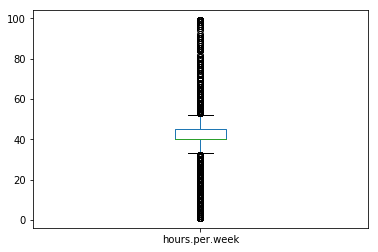

In [21]:
base1['hours.per.week'].plot.box()

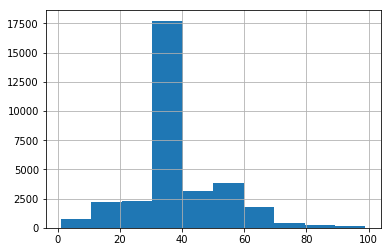

In [22]:
base1['hours.per.week'].hist()

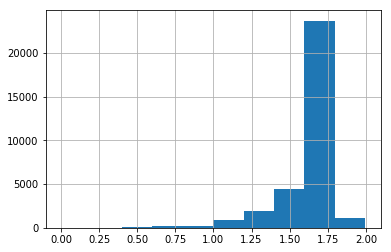

In [287]:
base1['hours_log10'] = log10(base1['hours.per.week'])
base1['hours_log10'].hist()

In [289]:
q1 = base1['hours.per.week'].quantile(q=0.25)
q3 = base1['hours.per.week'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

5.0


In [290]:
base1[base1['hours.per.week'] < (q1-1.5*iqr)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income,difference,hours_log,hours_log10
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K,NaN,1.255273,1.255273
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,20,>50K,NaN,1.301030,1.301030
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,20,>50K,NaN,1.301030,1.301030
22,61,Private,29059,HS-grad,9,Divorced,Sales,Unmarried,White,Female,25,<=50K,NaN,1.397940,1.397940
24,61,Doesnt-work,135285,HS-grad,9,Married-civ-spouse,Doesnt-work,Husband,White,Male,32,<=50K,NaN,1.505150,1.505150
26,33,Private,228696,1st-4th,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,32,<=50K,NaN,1.505150,1.505150
44,71,Doesnt-work,100820,HS-grad,9,Married-civ-spouse,Doesnt-work,Husband,White,Male,15,<=50K,NaN,1.176091,1.176091
62,44,Private,162028,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,6,>50K,NaN,0.778151,0.778151
76,41,Doesnt-work,27187,Assoc-voc,11,Married-civ-spouse,Doesnt-work,Husband,White,Male,12,>50K,NaN,1.079181,1.079181
103,50,Self-emp-not-inc,42402,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,30,>50K,NaN,1.477121,1.477121


In [291]:
base1[base1['hours.per.week'] > (q3+1.5*iqr)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income,difference,hours_log,hours_log10
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,60,>50K,NaN,1.778151,1.778151
13,32,Private,136204,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,55,>50K,NaN,1.740363,1.740363
16,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,76,>50K,NaN,1.880814,1.880814
29,38,Private,175360,10th,6,Never-married,Prof-specialty,Not-in-family,White,Male,90,>50K,NaN,1.954243,1.954243
32,52,Private,198863,Prof-school,15,Divorced,Exec-managerial,Not-in-family,White,Male,60,>50K,NaN,1.778151,1.778151
35,63,Federal-gov,39181,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Female,60,>50K,NaN,1.778151,1.778151
38,37,Self-emp-not-inc,137527,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,60,>50K,NaN,1.778151,1.778151
45,48,Private,121253,Bachelors,13,Married-spouse-absent,Sales,Unmarried,White,Female,70,>50K,NaN,1.845098,1.845098
51,50,Private,237729,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,72,>50K,NaN,1.857332,1.857332
60,43,Private,155106,Assoc-acdm,12,Divorced,Craft-repair,Not-in-family,White,Male,70,>50K,NaN,1.845098,1.845098


#### Observação
As técnicas de remoção de outliers foram executadas apenas para fim de aprendizado, não sendo aplicadas para não impactar negativamente a análise dos dados. Visto que os outliers apontados, dentro do contexto social dos Estados Unidos, não se caracterizam como outliers.

## Estatísticas descritivas


In [280]:
base1[(base1['sex'] == 'Male')]['age'].describe()

count    21790.000000
mean        39.433547
std         13.370630
min         17.000000
25%         29.000000
50%         38.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

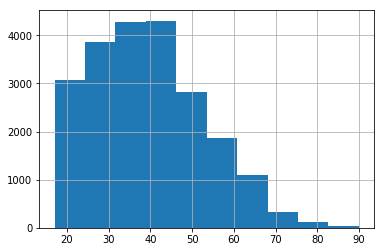

In [67]:
base1[(base1['sex'] == 'Male')]['age'].hist()

In [281]:
base1[(base1['sex'] == 'Female')]['age'].describe()

count    10771.000000
mean        36.858230
std         14.013697
min         17.000000
25%         25.000000
50%         35.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

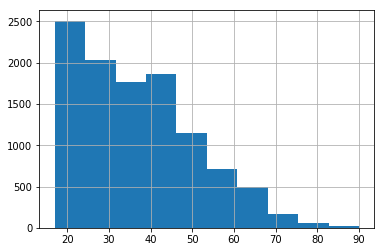

In [66]:
base1[(base1['sex'] == 'Female')]['age'].hist()

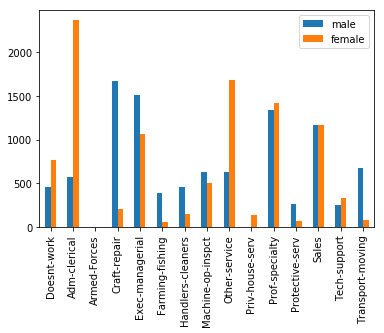

In [263]:
# distribuição de homens e mulheres de acordo com as profissões
maloData = base1[(base1['sex'] == 'Male')][:10000]['occupation'].value_counts()
femoData = base1[(base1['sex'] == 'Female')][:10000]['occupation'].value_counts()
malo = pd.DataFrame(data=maloData)
malo.columns = ['male']
femo = pd.DataFrame(data=femoData)
femo.columns = ['female']
occupationCount = pd.concat([malo, femo], axis=1, join_axes=[malo.index])

occupationCat = base1['occupation'].cat.categories
occupationCount.loc[occupationCat, ['male', 'female']].plot.bar()

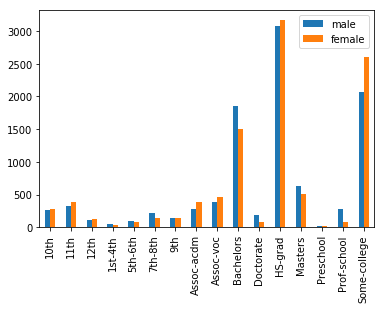

In [266]:
# distribuição de homens e mulheres de acordo com a formação acadêmica 
maledData = base1[(base1['sex'] == 'Male')][:10000]['education'].value_counts()
maled = pd.DataFrame(data=maledData)
maled.columns = ['male']
femedData = base1[(base1['sex'] == 'Female')][:10000]['education'].value_counts()
femed = pd.DataFrame(data=femedData)
femed.columns = ['female']
educationCount = pd.concat([maled, femed], axis=1, join_axes=[maled.index])

educationCat = base1['education'].cat.categories
educationCount.loc[educationCat, ['male', 'female']].plot.bar()

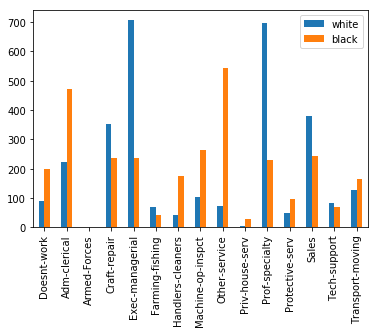

In [264]:
# distribuição de negros e brancos de acordo com as profissões
whiteoData = base1[(base1['race'] == 'White')][:3000]['occupation'].value_counts()
blackoData = base1[(base1['race'] == 'Black')][:3000]['occupation'].value_counts()
whiteo = pd.DataFrame(data=whiteoData)
whiteo.columns = ['white']
blacko = pd.DataFrame(data=blackoData)
blacko.columns = ['black']
occupationrCount = pd.concat([whiteo, blacko], axis=1, join_axes=[whiteo.index])

occupationrCat = base1['occupation'].cat.categories
occupationrCount.loc[occupationrCat, ['white', 'black']].plot.bar()

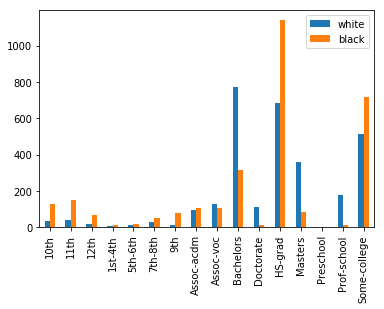

In [268]:
# distribuição de negros e brancos de acordo com a formação acadêmica
whiteedData = base1[(base1['race'] == 'White')][:3000]['education'].value_counts()
whiteed = pd.DataFrame(data=whiteedData)
whiteed.columns = ['white']
blackedData = base1[(base1['race'] == 'Black')][:3000]['education'].value_counts()
blacked = pd.DataFrame(data=blackedData)
blacked.columns = ['black']
educationrCount = pd.concat([whiteed, blacked], axis=1, join_axes=[whiteed.index])

educationrCat = base1['education'].cat.categories
educationrCount.loc[educationrCat, ['white', 'black']].plot.bar()

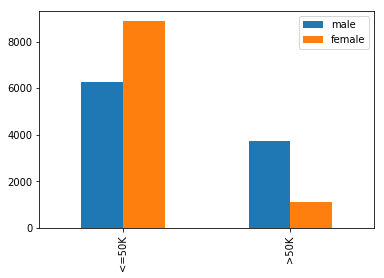

In [269]:
# distribuição de homens e mulheres de acordo com a renda financeira
malinData = base1[(base1['sex'] == 'Male')][:10000]['income'].value_counts()
malin = pd.DataFrame(data=malinData)
malin.columns = ['male']
feminData = base1[(base1['sex'] == 'Female')][:10000]['income'].value_counts()
femin = pd.DataFrame(data=feminData)
femin.columns = ['female']
incomeCount = pd.concat([malin, femin], axis=1, join_axes=[malin.index])

incomeCat = base1['income'].cat.categories
incomeCount.loc[incomeCat, ['male', 'female']].plot.bar()

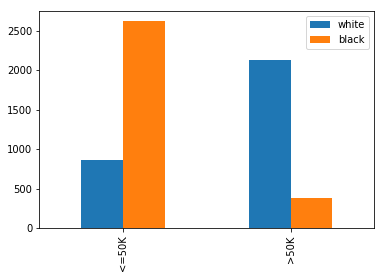

In [271]:
# distribuição de negros e brancos de acordo com a renda financeira
whiteinData = base1[(base1['race'] == 'White')][:3000]['income'].value_counts()
whitein = pd.DataFrame(data=whiteinData)
whitein.columns = ['white']
blackinData = base1[(base1['race'] == 'Black')][:3000]['income'].value_counts()
blackin = pd.DataFrame(data=blackinData)
blackin.columns = ['black']
incomerCount = pd.concat([whitein, blackin], axis=1, join_axes=[whitein.index])

incomerCat = base1['income'].cat.categories
incomerCount.loc[incomerCat, ['white', 'black']].plot.bar()

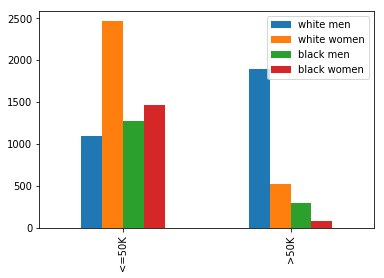

In [279]:
# distribuição de sexo e raça de acordo com a renda financeira
whiteminData = base1[(base1['race'] == 'White') & (base1['sex'] == 'Male')][:3000]['income'].value_counts()
whitemin = pd.DataFrame(data=whiteminData)
whitemin.columns = ['white men']
whitefinData = base1[(base1['race'] == 'White') & (base1['sex'] == 'Female')][:3000]['income'].value_counts()
whitefin = pd.DataFrame(data=whitefinData)
whitefin.columns = ['white women']
blackminData = base1[(base1['race'] == 'Black') & (base1['sex'] == 'Male')][:3000]['income'].value_counts()
blackmin = pd.DataFrame(data=blackminData)
blackmin.columns = ['black men']
blackfinData = base1[(base1['race'] == 'Black') & (base1['sex'] == 'Female')][:3000]['income'].value_counts()
blackfin = pd.DataFrame(data=blackfinData)
blackfin.columns = ['black women']
incomesCount = pd.concat([whitemin, whitefin, blackmin, blackfin], axis=1, join_axes=[whitemin.index])

incomesCat = base1['income'].cat.categories
incomesCount.loc[incomesCat, ['white men', 'white women', 'black men', 'black women']].plot.bar()

### Correlação entre variáveis numéricas

In [14]:
base1.corr(method='spearman')

,age,fnlwgt,education.num,hours.per.week
age,1.000000,-0.078141,0.066345,0.142907
fnlwgt,-0.078141,1.000000,-0.035706,-0.021621
education.num,0.066345,-0.035706,1.000000,0.167215
hours.per.week,0.142907,-0.021621,0.167215,1.000000


## Testes de hipótese

### Comparando horas de trabalho entre homens e mulheres

In [237]:
femhData = base1[base1['sex'] == 'Female']['hours.per.week']
femh = pd.DataFrame(data = femhData)
femh.columns = ['female']
femh[:50].describe()

,female
count,50.000000
mean,41.500000
std,13.026269
min,6.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,72.000000


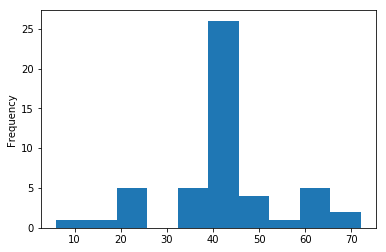

In [188]:
femh['female'][:50].plot(kind='hist')

In [186]:
from scipy import stats
stats.shapiro(femh['female'][:50])

(0.9147955775260925, 0.0015369796892628074)

Como o p-value é menor que 0,05 (nível de significância), rejeitamos a hipótese de que essa amostra assume a distribuição normal.

In [238]:
malhData = base1[base1['sex'] == 'Male']['hours.per.week']
malh = pd.DataFrame(data = malhData)
malh.columns = ['male']
malh[:50].describe()

,male
count,50.000000
mean,47.160000
std,13.311588
min,12.000000
25%,40.000000
50%,45.000000
75%,51.500000
max,90.000000


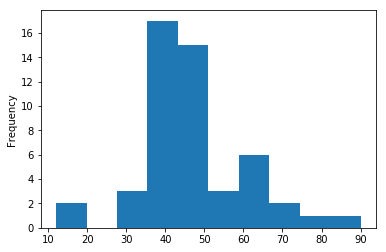

In [187]:
malh['male'][:50].plot(kind='hist')

In [185]:
stats.shapiro(malh['male'][:50])

(0.9172504544258118, 0.0018783769337460399)

Como o p-value é menor que 0,05 (nível de significância), rejeitamos a hipótese de que essa amostra assume a distribuição normal.

Dado que ambas as amostras de homens e mulheres não assumem a distribuição normal, realizaremos o teste Mann-Whitney U para grupos não pareados de dados não-paramétricos. 

In [184]:
stats.mannwhitneyu(malh['male'][:50], femh['female'][:50])

MannwhitneyuResult(statistic=926.5, pvalue=0.011285346241649633)

#### Conclusão
Dado que o p-value é menor que o nível de significância (0,05), é rejeitada a hipótese de que as distribuições da amostras acima são iguais.

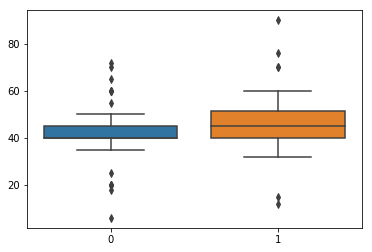

In [239]:
import seaborn as sns
sns.boxplot(data=[femh[:50], malh[:50]])

### Comparando tempo de estudo entre homens e mulheres

In [240]:
femeData = base1[base1['sex'] == 'Female']['education.num']
feme = pd.DataFrame(data = femeData)
feme.columns = ['female']
feme[:50].describe()

,female
count,50.000000
mean,11.380000
std,3.116055
min,3.000000
25%,9.000000
50%,10.500000
75%,14.000000
max,16.000000


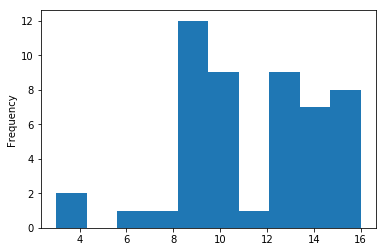

In [190]:
feme['female'][:50].plot(kind='hist')

In [191]:
stats.shapiro(feme['female'][:50])

(0.9227873086929321, 0.00297794328071177)

Como o p-value é menor que 0,05 (nível de significância), rejeitamos a hipótese de que essa amostra assume a distribuição normal.

In [241]:
maleData = base1[base1['sex'] == 'Male']['education.num']
male = pd.DataFrame(data = maleData)
male.columns = ['male']
male[:50].describe()

,male
count,50.000000
mean,11.220000
std,3.240622
min,2.000000
25%,9.000000
50%,11.500000
75%,13.750000
max,16.000000


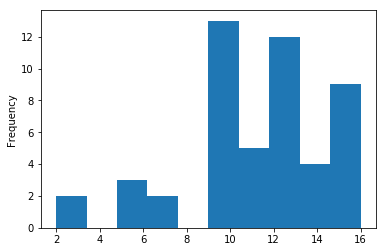

In [193]:
male['male'][:50].plot(kind='hist')

In [194]:
stats.shapiro(male['male'][:50])

(0.9269147515296936, 0.004231224302202463)

Como o p-value é menor que 0,05 (nível de significância), rejeitamos a hipótese de que essa amostra assume a distribuição normal.

Dado que ambas as amostras de homens e mulheres não assumem a distribuição normal, realizaremos o teste Mann-Whitney U para grupos não pareados de dados não-paramétricos.

In [196]:
stats.mannwhitneyu(male['male'][:50], feme['female'][:50])

MannwhitneyuResult(statistic=1242.0, pvalue=0.479171180611121)

#### Conclusão
Como o p-value é maior que o nível de significância 0,05, a hipótese de que as distribuições das amostras acima são iguais não é rejeitada.

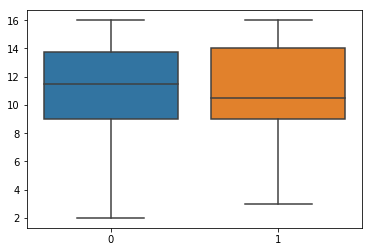

In [242]:
import seaborn as sns
sns.boxplot(data=[male[:50], feme[:50]])

### Comparando horas de trabalho entre pessoas brancas e negras

In [243]:
whitehData = base1[base1['race'] == 'White']['hours.per.week']
whiteh = pd.DataFrame(data = whitehData)
whiteh.columns = ['white']
whiteh[:10].describe()

,white
count,10.000000
mean,38.800000
std,12.108766
min,18.000000
25%,40.000000
50%,40.000000
75%,43.750000
max,60.000000


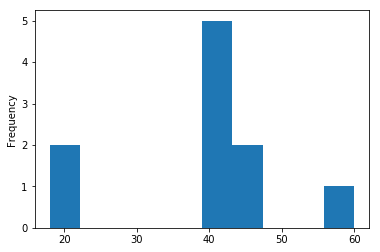

In [228]:
whiteh['white'][:10].plot(kind='hist')

In [220]:
stats.shapiro(whiteh['white'][:10])

(0.8449731469154358, 0.05060211569070816)

Visto que o p-value é igual ao nível de significância (0,05), rejeitamos a hipótese de que essa amostra assume a distribuição normal.

In [244]:
blackhData = base1[base1['race'] == 'Black']['hours.per.week']
blackh = pd.DataFrame(data = blackhData)
blackh.columns = ['black']
blackh[:10].describe()

,black
count,10.000000
mean,39.000000
std,7.745967
min,20.000000
25%,40.000000
50%,40.000000
75%,40.000000
max,50.000000


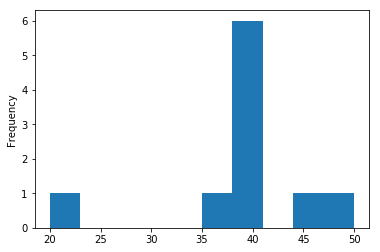

In [229]:
blackh['black'][:10].plot(kind='hist')

In [221]:
stats.shapiro(blackh['black'][:10])

(0.7783274054527283, 0.007899285294115543)

Visto que o p-value é igual ao nível de significância (0,05), rejeitamos a hipótese de que essa amostra assume a distribuição normal.

Dado que ambas as amostras de brancos e negros não assumem a distribuição normal, realizaremos o teste Mann-Whitney U para grupos não pareados de dados não-paramétricos.

In [222]:
stats.mannwhitneyu(whiteh['white'][:10], blackh['black'][:10])

MannwhitneyuResult(statistic=47.5, pvalue=0.43413146071761544)

#### Conclusão
Como o p-value é maior que o nível de significância 0,05, a hipótese de que as distribuições das amostras acima são iguais não é rejeitada.

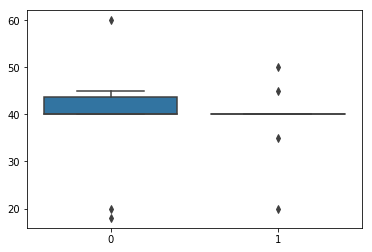

In [245]:
import seaborn as sns
sns.boxplot(data=[whiteh[:10], blackh[:10]])

### Comparando o tempo de estudo entre pessoas brancas e negras

In [246]:
whiteeData = base1[base1['race'] == 'White']['education.num']
whitee = pd.DataFrame(data = whiteeData)
whitee.columns = ['white']
whitee[:50].describe()

,white
count,50.000000
mean,10.800000
std,3.585686
min,2.000000
25%,9.000000
50%,10.000000
75%,14.000000
max,16.000000


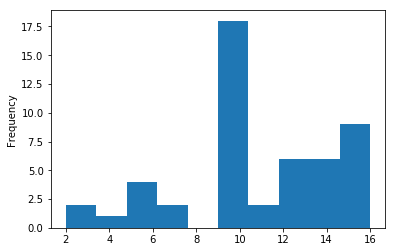

In [233]:
whitee['white'][:50].plot(kind='hist')

In [235]:
stats.shapiro(whitee['white'][:50])

(0.9412621855735779, 0.015118613839149475)

Como o p-value é menor que o nível de significância 0,05, rejeitamos a hipótese de que essa amostre assume a distribuição normal.

In [247]:
blackeData = base1[base1['race'] == 'Black']['education.num']
blacke = pd.DataFrame(data = blackeData)
blacke.columns = ['black']
blacke[:50].describe()

,black
count,50.000000
mean,10.280000
std,2.828716
min,3.000000
25%,9.000000
50%,10.000000
75%,13.000000
max,16.000000


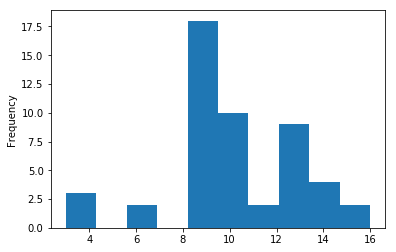

In [232]:
blacke['black'][:50].plot(kind='hist')

In [231]:
stats.shapiro(blacke['black'][:50])

(0.9088611006736755, 0.0009551463299430907)

Como o p-value é menor que o nível de significância 0,05, rejeitamos a hipótese de que essa amostre assume a distribuição normal.

Dado que ambas as amostras de brancos e negros não assumem a distribuição normal, realizaremos o teste Mann-Whitney U para grupos não pareados de dados não-paramétricos.

In [236]:
stats.mannwhitneyu(whitee['white'][:50], blacke['black'][:50])

MannwhitneyuResult(statistic=1092.5, pvalue=0.13556583290860064)

#### Conclusão
Como o p-value é maior que o nível de significância 0,05, a hipótese de que as distribuições das amostras acima são iguais não é rejeitada.

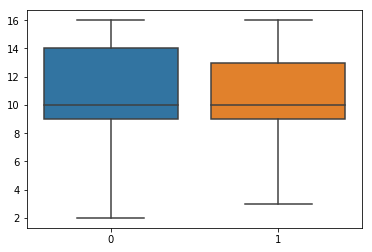

In [248]:
import seaborn as sns
sns.boxplot(data=[whitee[:50], blacke[:50]])

## Conclusão
Ao final das análises realizadas, pode-se perceber que há diferença na carga horária semanal de trabalho entre homens e mulheres, sendo os homens os que possuem maior carga horária. Assim como podemos notar a desigualdade de renda entre homens e mulheres, sendo o homens os que mais têm renda acima de 50 mil, e entre brancos e negros, sendo brancos os que mais têm renda acima de 50 mil. Pode-se observar também a predominância de homens em profissões como reparos, cargos de gerência executiva e condução de transportes. Há também a predominância de brancos em cargos de administração executiva contra a predominância de negros em serviços de limpeza. Em relação ao tempo de estudo, pode-se concluir que não há muita diferença entre homens e mulheres. Já entre negros e brancos, apesar de não haver diferenças gritntes em relação ao tempo de estudo, a quantidade de brancos com ensino superior é maior que a de negros, enquanto que a quantidade de negros que têm apenas o ensino médio completo é muito maior do que a de brancos. 